In [45]:
%load_ext autoreload
%autoreload 2


import os
import pandas as pd
from pathlib import Path
from typing import List, Dict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
output_dir = Path("output")
# read all csvs
csv_files = list(output_dir.glob("*.csv"))
# read all csvs into a list of dataframes
dfs = []
for csv_file in csv_files:
    # read the csv file into a dataframe
    df = pd.read_csv(csv_file)
    # add the dataframe to the list
    dfs.append(df)

# concatenate all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [63]:
def filter_df(df: pd.DataFrame, filter_by: Dict):
    for key, value in filter_by.items():
        if key in df.columns:
            df = df[df[key].isin(value)]
    return df

clustering = "random"


filter_by = {
    "name": ["base-lu-B"],
    "clustering": [clustering],
    #  "n_classes": []
}
filtered_df = filter_df(df, filter_by)
x1 = filtered_df["n_classes"]
y1 = filtered_df["A"]
data1 = zip(x1, y1)

filter_by = {
    "name": ["base-B"],
    "clustering": [clustering],
    #  "n_classes": []
}
filtered_df = filter_df(df, filter_by)
x2 = filtered_df["n_classes"]
y2 = filtered_df["A"]
data2 = zip(x2, y2)


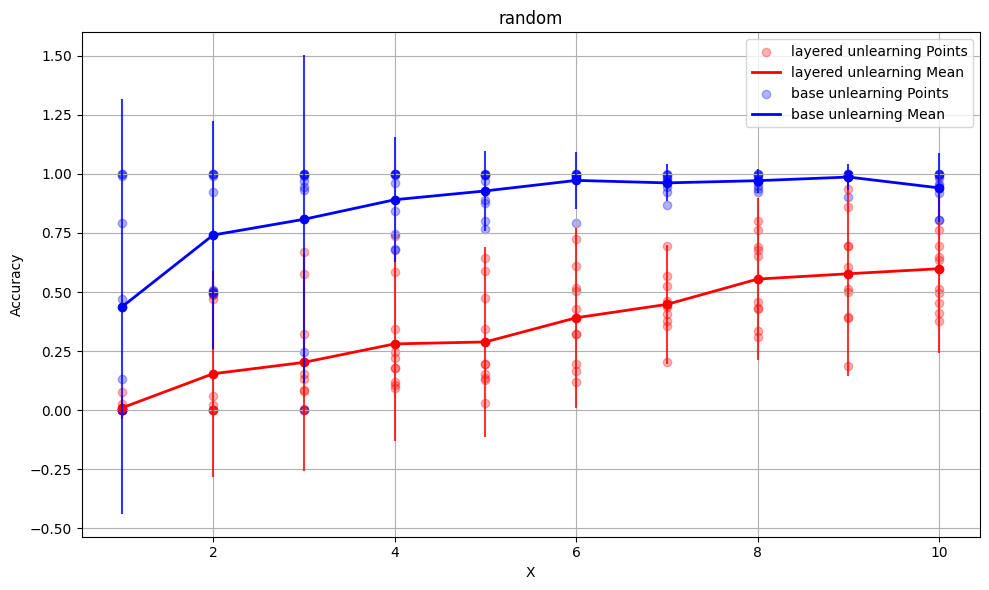

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_grouped_data(data, color, label):
    grouped = defaultdict(list)
    for x, y in data:
        grouped[int(x)].append(y)

    x_vals = sorted(grouped.keys())
    means = []
    stds = []

    for x in x_vals:
        ys = np.array(grouped[x])
        mean = np.mean(ys)
        std = np.std(ys)
        means.append(mean)
        stds.append(std)

        # Scatter individual points
        plt.scatter([x] * len(ys), ys, color=color, alpha=0.3, label=f'{label} Points' if x == x_vals[0] else "")

        # Mean point
        plt.plot(x, mean, 'o', color=color)

        # Confidence interval: vertical line for mean ± 2 std
        plt.vlines(x, mean - 2 * std, mean + 2 * std, color=color, alpha=0.8)

    # Line connecting means
    plt.plot(x_vals, means, color=color, linewidth=2, label=f'{label} Mean')

# Plot setup
plt.figure(figsize=(10, 6))

plot_grouped_data(data1, color='red', label='layered unlearning')
plot_grouped_data(data2, color='blue', label='base unlearning')

plt.xlabel('X')
plt.ylabel('Accuracy')
plt.title(f'{clustering}')
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.show()
# make figs dir if not exists
os.makedirs("figs", exist_ok=True)
plt.savefig(f"figs/{clustering}.png", dpi=300)